Hasil Prediksi:
['drugX' 'drugY' 'drugX' 'drugC' 'drugY' 'drugY' 'drugY' 'drugX' 'drugA'
 'drugX' 'drugA' 'drugX' 'drugY' 'drugA' 'drugB' 'drugY' 'drugB' 'drugX'
 'drugC' 'drugY' 'drugB' 'drugX' 'drugX' 'drugY' 'drugY' 'drugY' 'drugC'
 'drugX' 'drugY' 'drugX' 'drugY' 'drugC' 'drugC' 'drugY' 'drugA' 'drugY'
 'drugX' 'drugA' 'drugY' 'drugA']

Label Sebenarnya:
['drugX' 'drugY' 'drugX' 'drugC' 'drugY' 'drugY' 'drugY' 'drugX' 'drugA'
 'drugX' 'drugA' 'drugX' 'drugY' 'drugA' 'drugB' 'drugY' 'drugB' 'drugX'
 'drugC' 'drugY' 'drugB' 'drugX' 'drugX' 'drugY' 'drugY' 'drugY' 'drugC'
 'drugX' 'drugY' 'drugX' 'drugY' 'drugC' 'drugC' 'drugY' 'drugA' 'drugY'
 'drugX' 'drugA' 'drugY' 'drugA']

Confusion Matrix:
[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]

Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC    

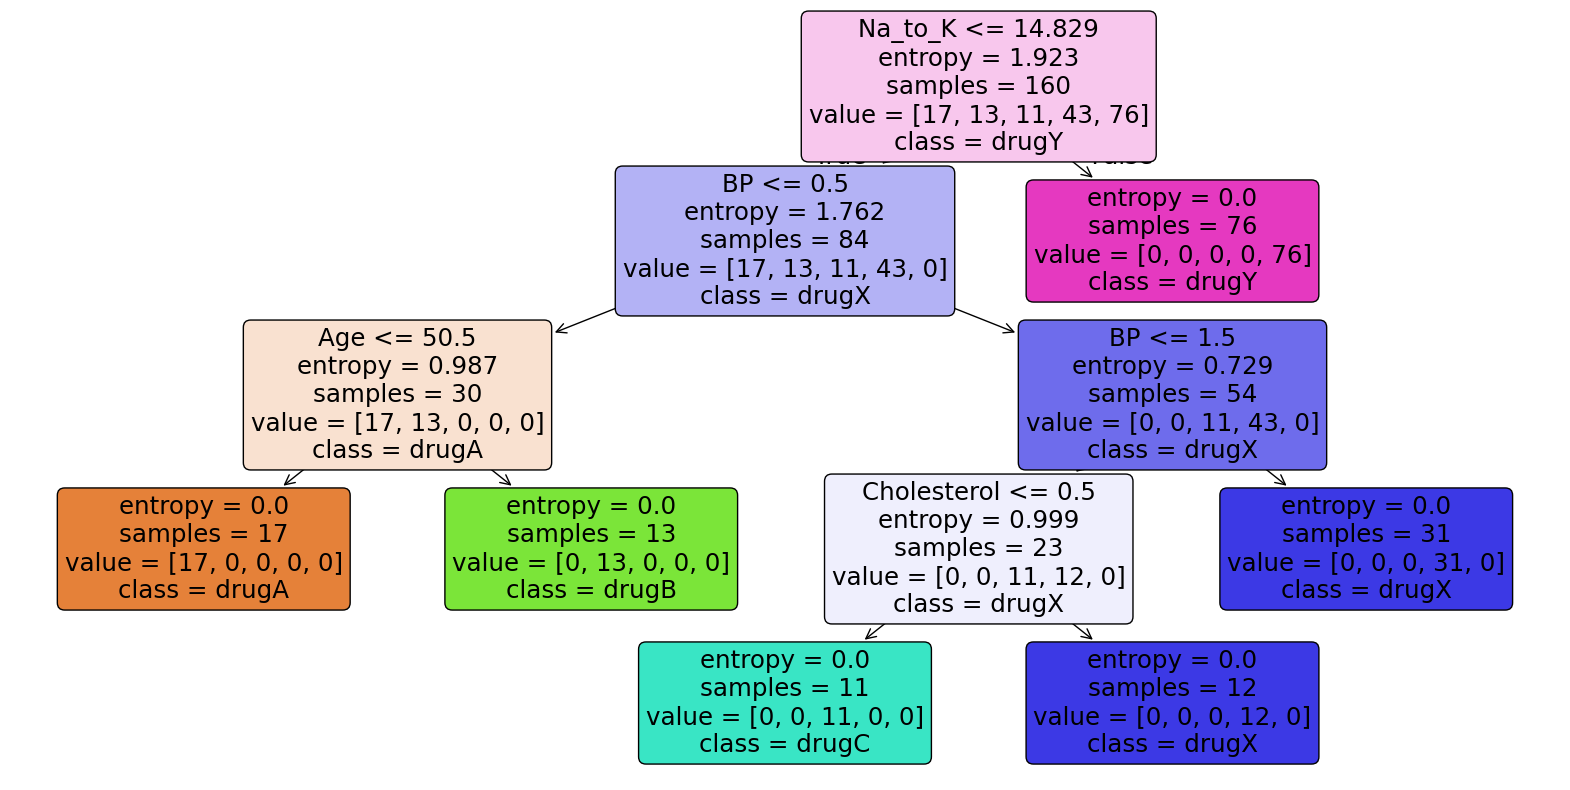

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 1. Memuat Dataset
file_path = "/content/drug200.csv"
data = pd.read_csv(file_path)

# 2. Preprocessing Data
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])  # Encode 'Sex'
data['BP'] = label_encoder.fit_transform(data['BP'])    # Encode 'BP'
data['Cholesterol'] = label_encoder.fit_transform(data['Cholesterol'])  # Encode 'Cholesterol'

# Fitur dan label
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = data['Drug']

# 3. Memisahkan Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Membuat Model
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# 5. Pelatihan Model
model.fit(X_train, y_train)

# 6. Prediksi dan Evaluasi
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Hasil Prediksi:")
print(y_pred)
print("\nLabel Sebenarnya:")
print(y_test.values)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Akurasi Model: {accuracy * 100:.2f}%")

# 7. Visualisasi Pohon Keputusan
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True, rounded=True)
plt.show()
